<a href="https://colab.research.google.com/github/carlosmding/academicProject/blob/main/EDA_Reingresos_NCSC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Librerías usadas en el Proyectos**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
import seaborn as sns
from pandas.plotting import scatter_matrix
import missingno as msno

**1. Conectar a Drive y cargar del dataset**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
path=  "/content/drive/MyDrive/PracticaAcademica_CarlosPinto/BD SagradoCorazon.csv"
datos = pd.read_csv(path, sep=",")
df =datos.copy()

<ipython-input-25-82e1bcbc8af3>:2: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  datos = pd.read_csv(path, sep=",")


**2. Visualizando el dataset**

In [8]:
#Apariencia de la tabla de datos
df.head()

,HospitalID,Hospital,Año,Mes,HistoriaClinica,Episodio,Sexo,GrupoEtario,Edad,Charlson,...,Tiempo_Quirurgico_Total,Reingreso_Dias,Reingreso_Rangos,Ind_Reing_7_dias,Ind_Reing_15_dias,Ind_Reing_30_dias,Ind_Compl_Aten_Med,Ind_Inf_Nosoc,Ind_Mort,Ind_Event_Adv_Rel_Med
0,302,Clínica Sagrado Corazón,2023,5,5175134,1,M,18 años – 30 años,22,1,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,302,Clínica Sagrado Corazón,2023,5,32413158,1,F,71 años – 80 años,77,1,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,302,Clínica Sagrado Corazón,2023,2,1042459939,2,F,18 años – 30 años,24,0,...,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,302,Clínica Sagrado Corazón,2023,5,8037874,12,M,71 años – 80 años,79,0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,302,Clínica Sagrado Corazón,2023,5,3344754,5,M,Mayor de 81 años,85,2,...,0.0,15.0,15 dias,NaN,SI,NaN,NaN,NaN,NaN,NaN


In [9]:
#Número de muestras (filas) y caracteristicas incluyendo variable de salida (columnas)
df.shape

(31095, 44)

**3. Exploración descriptiva del dataset**

In [10]:
# Tipos de cada columna y cantidad de nulos
# ==============================================================================
# En pandas, el tipo "object" hace referencia a strings
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31095 entries, 0 to 31094
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   HospitalID               31095 non-null  int64  
 1   Hospital                 31095 non-null  object 
 2   Año                      31095 non-null  int64  
 3   Mes                      31095 non-null  int64  
 4   HistoriaClinica          31095 non-null  object 
 5   Episodio                 31095 non-null  object 
 6   Sexo                     31095 non-null  object 
 7   GrupoEtario              31095 non-null  object 
 8   Edad                     31095 non-null  int64  
 9   Charlson                 31095 non-null  int64  
 10  FechaIngreso             31095 non-null  object 
 11  FechaEgreso              31095 non-null  object 
 12  TipoIngreso              31095 non-null  object 
 13  TipoAlta                 31095 non-null  object 
 14  ReingresoDias         

**Variables Categóricas**
1. **Hospital**: es el nombre de la insititución, todo los 31095 registros tiene la misma información
2. **Episodio**: es un consecutivo de los ingresos hospitalarios del paciente
3. **Sexo**
4. **Grupo etáreo**: grupo al que pertencen en cluster según el ciclo vital
5. **Fecha de ingreso**
6. **Fecha de alta**
7. **Tipo de alta**: diferentes modalidades en las que se pudo presentar el alta
8. **GRDCodigo**: código del Grupo Relacionado de Diagnóstico al que pertenece el egreso
9. **GRDDescripcion**: descripcrión del GRD al que pertenence
10. **PagadorID**: código asociado a entidad responsable de pago
11. **NombrePagador**: nombre del la entidad responsable de pago
12. **Severidad**: clasificación de severidad según presencia de complicaciones o comorbilidades
13. **RiesgoMorbilidad**: clasificación del riesgo de morbilidad como probabilidad de estancia prolongada
14. **VMI**: clasificación de uso de ventilación mecánica
15. **RiesgoMortalidad**: clasificación del riesgo de mortalidad según índice de Charlson y edad.
16. **DxCodigo**: código CIE-10 del diagnóstico principal
17. **DxDescripcion**: descripción del diagnóstico principal
18. **Especialidad**: nombre de la especialidad tratante
19. **ReingresoRangos**: clasificación de reingreso en 3 rangos (7, 15 y 30 dias)


**Variables Numéricas**
1. **HospitalID**: es el ID de la institución
2. **Año**: año de la atención
3. **Mes**: mes de la atención
4. **Edad**: edad en años
5. **Charlson**: índice de Charlson (morbilidad)
6. **ReingresosDias**: número de dias desde la última hospitalización hasta el ingreso actual
7. **ValorFacturado**: valor en pesos del valor facturado por la hospitalización
8. **CostoCalculado**: valor en pesos del costo calculado por la atención
9. **CostoInformado**: valor en pesos del costo de la atención informado por la institución
10. **EstanciaMedia**: número de dias de hospitalización
11. **EstanciaPreoperatoria**: número de días desde el ingreso hasta la primera intervención quirúrgica (si tuvo algún procedimiento)
12. **CantidadDx**: número de diagnósticos asocidos al episodio hospitalario
13. **EspecialidadID**: ID de la especialidad tratante
14. **Multimorbilidad**: número de enfermedades crónicas
15. **Tiempo_quirurgico_total**: número de horas quirúrgicas reportadas
16. **Reingresos_Dias**: variable repetida de ReingresoDias

**Binarización de variables**
1. **Ind_Reing_7_dias**: indicador de reingreso a los 7 dias
2. **Ind_Reing_15_dias**: indicador de reingreso a los 15 dias
3. **Ind_Reing_30_dias**: indicador de reingreso a los 30 dias
4. **Ind_Compl_Aten_Med**: indicador de complicación asociada a la atención
5. **Ind_Inf_Nosoc**: indicador de infección asociada a la atención
6. **Ind_Mort**: indicador de mortalidad en la hospitalización
7. **Ind_Event_Adv_Rel_Med**: indicador de eventos relacionados con medicamentos en la atención

In [26]:
#Binarizaciónde 7 variables categóricas

var_binarizar = ['Ind_Reing_7_dias', 'Ind_Reing_15_dias', 'Ind_Reing_30_dias', 'Ind_Compl_Aten_Med',
                 'Ind_Inf_Nosoc', 'Ind_Mort', 'Ind_Event_Adv_Rel_Med']

df[var_binarizar] = df[var_binarizar].applymap(lambda x: 1 if not pd.isna(x) else 0)

In [27]:
#Cantidad de datos nulos por caracteristica
k = df.isna().sum()
k[k!=0]

ReingresoDias       23021
PagadorID             409
NombrePagador       12715
ValorFacturado        409
CostoCalculado        643
CostoInformado        643
DxCodigo               25
DxDescripcion          25
CantidadDx             11
EspecialidadID          9
Reingreso_Dias      23021
Reingreso_Rangos    29164
dtype: int64

<Axes: >

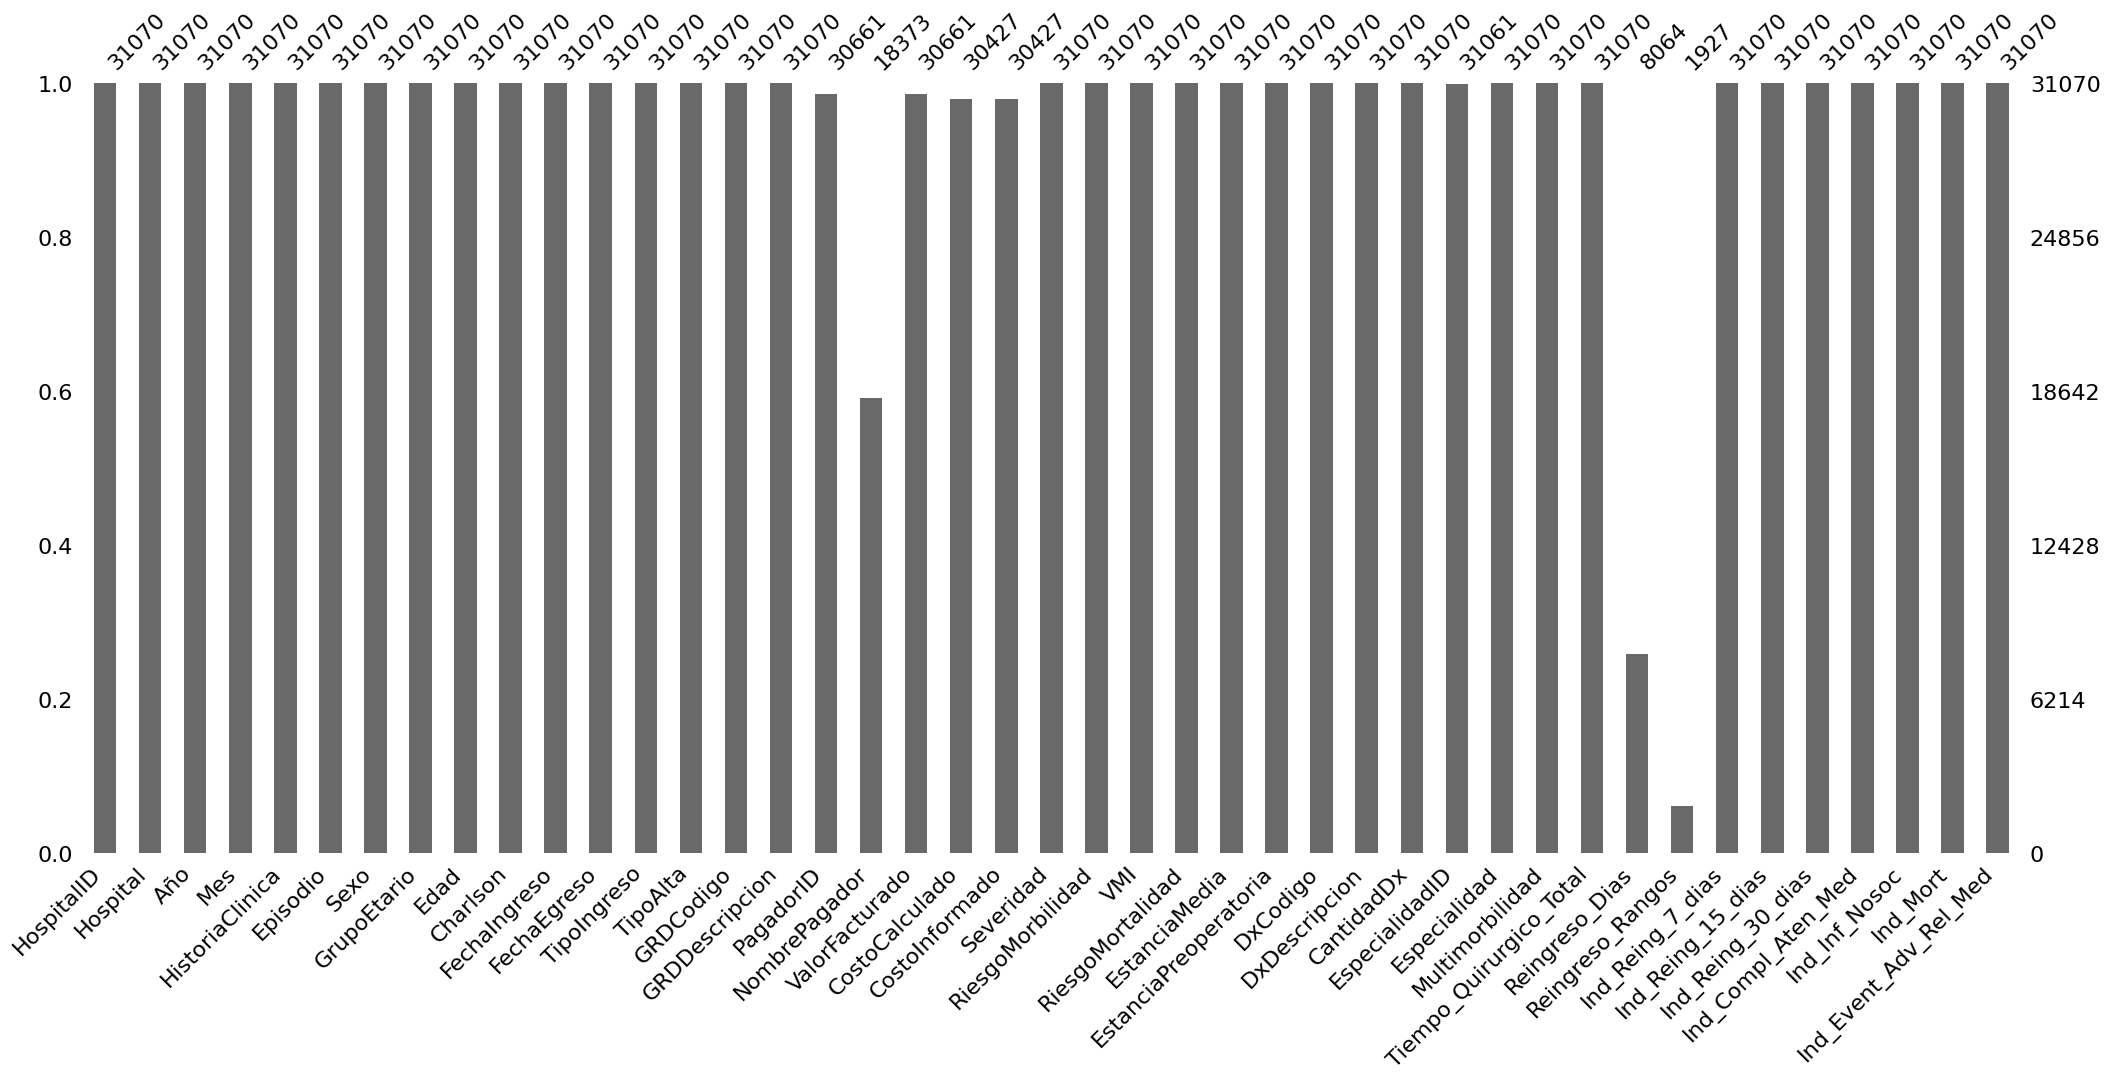

In [28]:
#ReingresoDias y Reingreso_Dias tiene la misma información por lo tanto se elimina la primera
df=df.drop(['ReingresoDias'], axis=1)

#DxCodigo y DxDescripcion tienen 25 registros sin datos, se eliminarán dado la impoartancia de esta variable
df=df.dropna(subset=['DxCodigo'])

#Visualización de datos nulos con librería missingno
msno.bar(df)

In [50]:
#Cantidad de datos nulos por caracteristica
k = df.isna().sum()
k[k!=0]

PagadorID             409
NombrePagador       12697
ValorFacturado        409
CostoCalculado        643
CostoInformado        643
EspecialidadID          9
Reingreso_Dias      23006
Reingreso_Rangos    29143
dtype: int64

**3.1 Descripción algunas variables numéricas**

In [14]:
df.describe()[['Edad','Charlson','EstanciaMedia','EstanciaPreoperatoria']]

,Edad,Charlson,EstanciaMedia,EstanciaPreoperatoria
count,31095.000000,31095.000000,31095.000000,31095.000000
mean,48.370767,0.716353,5.038013,0.704132
std,22.229446,1.325326,6.284923,2.420845
min,0.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,1.000000,0.000000
50%,49.000000,0.000000,4.000000,0.000000
75%,66.000000,1.000000,6.000000,0.000000
max,104.000000,12.000000,124.000000,61.000000


<Axes: xlabel='Edad', ylabel='Count'>

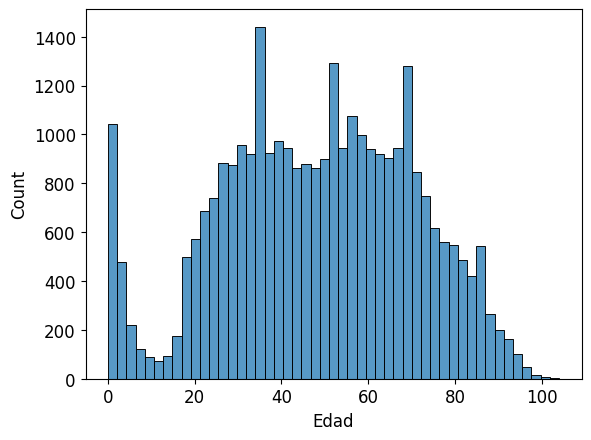

In [34]:
#Histograma de variable Edad
sns.histplot(data=df, x='Edad')

<Axes: ylabel='Número de diagnósticos CIE-10'>

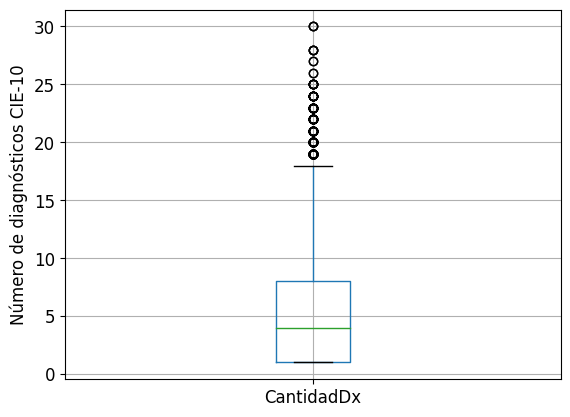

In [36]:
#Para visualizar distrubución de los datos, simetria y datos atipicos se usan boxplot para variables numéricas
df.boxplot(column="CantidadDx", ylabel="Número de diagnósticos CIE-10")

**3.2 Cuantificación de variables categóricas**

In [37]:
# Para contabilizar variables categóricas:
df["Reingreso_Rangos"].value_counts()

30 dias    777
7 dias     598
15 dias    552
Name: Reingreso_Rangos, dtype: int64

<Axes: title={'center': 'Distrubución por tipo de reingreso'}, ylabel='Reingreso_Rangos'>

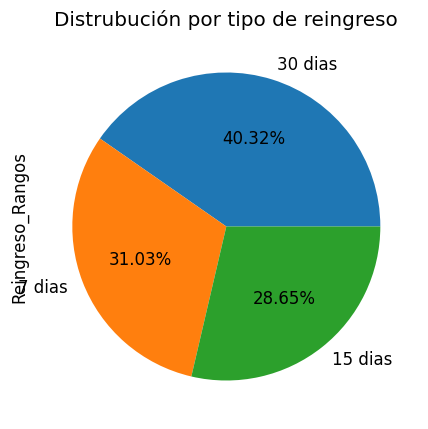

In [41]:
reingreso = df["Reingreso_Rangos"].value_counts()
reingreso.plot(kind = "pie", title="Distrubución por tipo de reingreso", autopct='%1.2f%%', figsize=(7,5))

<Axes: xlabel='Edad', ylabel='Sexo'>

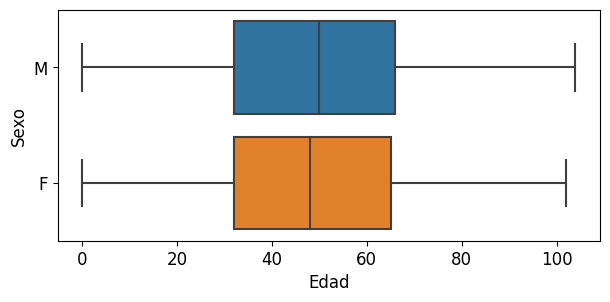

In [42]:
# Se pueden relacionar variables categóricas con variables numéricas
plt.figure(figsize=(7,3))
sns.boxplot(x="Edad", y="Sexo", data=df)